# Pymaceuticals Inc.
---

### Analysis

- Based upon the results, it can be concluded that the drug Capomulin is most effective when Minimizing the total volume of tumors in mice. However, as seen in the listed bar chart, Ramicane has similar results to Capomulin.
- The data also show the correlation between mouse weight and the total volume the tumor within each mouse. There is a direct relation between the two. If the mouse increases in weight so does the tumor.

 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [8]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
num_mice = len(combined_df['Mouse ID'].unique())
# Printing number of mice
print(f"Number of mice: {num_mice}")


Number of mice: 249


In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_df[combined_df[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicated_ID = duplicated_mice["Mouse ID"].unique()

duplicated_ID

array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = combined_df[combined_df.duplicated(["Mouse ID","Timepoint"])]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# Checking the number of mice in the clean DataFrame by going through it 
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group Data and calculating it using aggregation
summary_data = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Naming Columns 
summary_data = summary_stats.rename(columns
                                    
    ={ 'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Deviation',
    'sem': 'Tumor Volume Std. Err.'})

summary_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

one_line = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Deviation', 'sem': 'Tumor Volume SEM'})
one_line



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

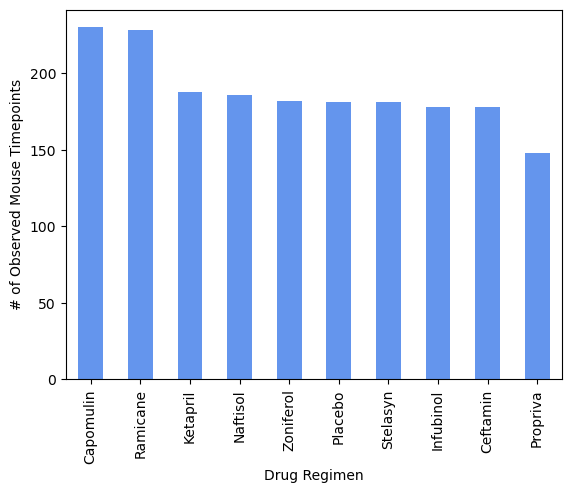

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints)

bar_chrt = clean_df[["Drug Regimen","Timepoint"]]

bar_chrt = bar_chrt["Drug Regimen"].value_counts()

#Creating labels and Chart 
bar_chrt.plot(kind="bar",color = "cornflowerblue",alpha="75", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

plt.show()

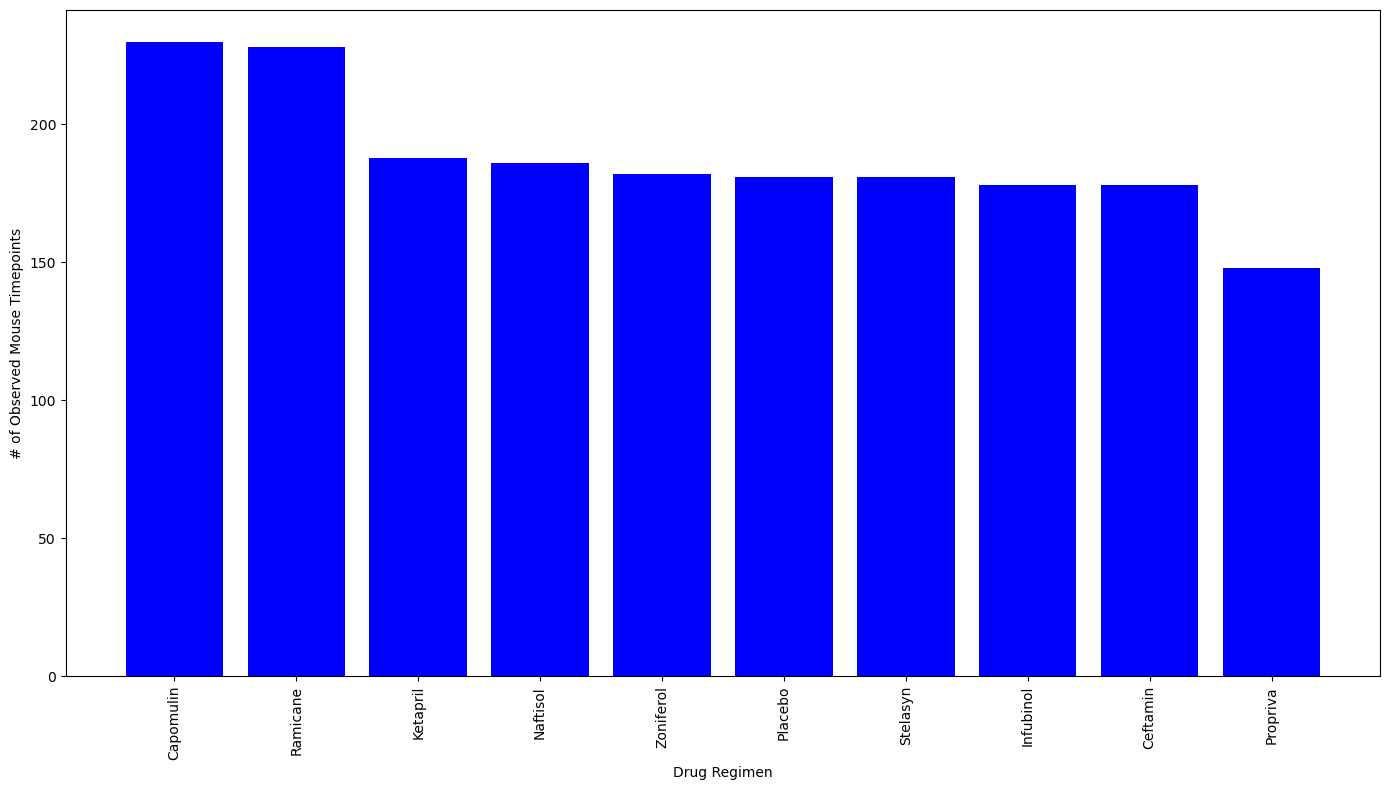

In [105]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
bar_data = clean_df['Drug Regimen'].value_counts()
#data
regimens = bar_data.index
counts = bar_data.values
#setting up 
plt.figure(figsize=(12, 8))
plt.bar(regimens, counts, color='blue')
plt.xlabel('Drug Regimen'
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90) 
#showing final 
plt.tight_layout()
plt.show()

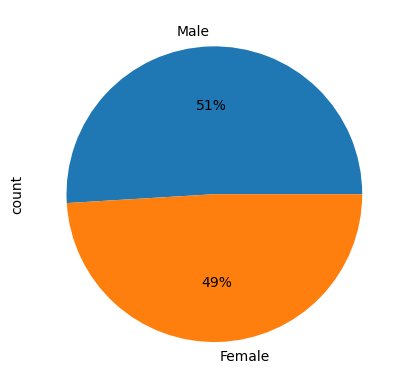

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
PieChrt = clean_df["Sex"].value_counts()
Sex = ["Male", "Female"]
#Setting Chrt 
PieChrt.plot(kind = "pie" , autopct="%1.0f%%")
ylabel = "Sex"

plt.show()

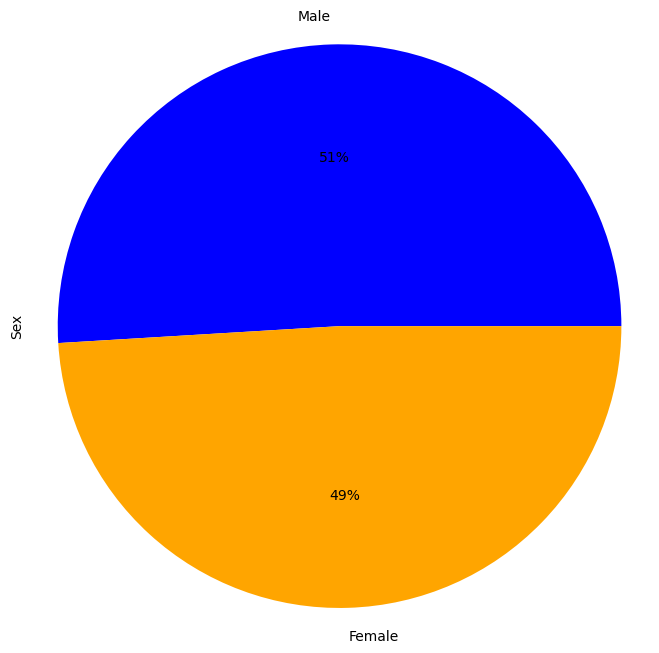

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot'
pie_chrt = clean_df['Sex'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(pie_chrt, labels=pie_chrt.index, autopct='%1.0f%%', colors=['blue', 'orange'])

plt.ylabel('Sex')
plt.axis('equal')  
plt.show()

## Quartiles, Outliers and Boxplots

In [153]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
tp_df = pd.DataFrame(last_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_df, tp_df, on=['Mouse ID', 'Timepoint'])


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatment_df = merge_df[merge_df['Drug Regimen'] == treatment]
    volume_data = treatment_df['Tumor Volume (mm3)']
    tumor_volumes.append(volume_data)
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = volume_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile


# Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outliers = volume_data[(volume_data < lower_bound) | (volume_data > upper_bound)]
    
    if outliers.empty:
        print(f"{treatment}'s potential outliers: No outliers")
    else:
        print(f"{treatment}'s potential outliers:\n{outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


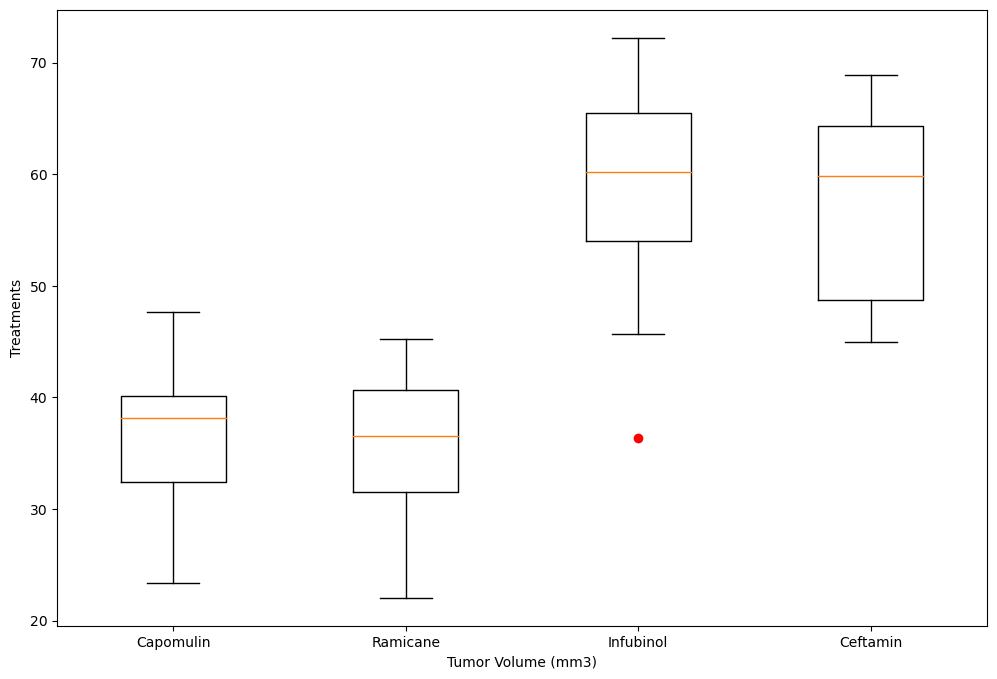

In [171]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(12, 8))
plt.boxplot(tumor_volumes, labels=treatments, sym='r')  
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Treatments')

plt.show()

## Line and Scatter Plots

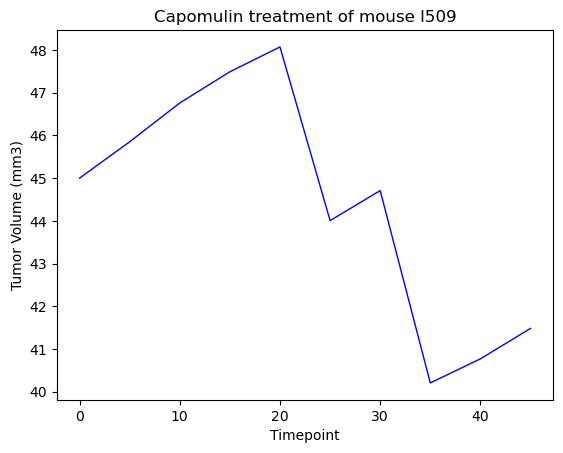

In [216]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
plot_df = mouse_data.loc[mouse_data["Mouse ID"] == "l509", :]

tumor_volume = plot_df["Tumor Volume (mm3)"]
x_axis = plot_df["Timepoint"]

plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, tumor_volume, linewidth=1, color="b", label="Tumor Volume (mm3)")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')

plt.show()

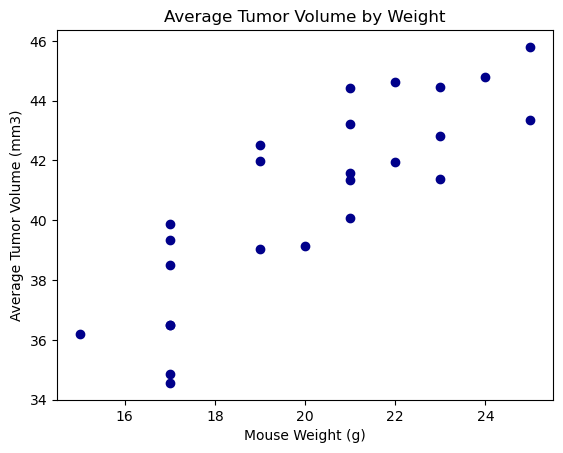

In [228]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
avg_tumor_vl = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
# Setting up labels 
plt.scatter(mouse_weight, avg_tumor_vl, marker="o", color="darkblue")
plt.title('Average Tumor Volume by Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


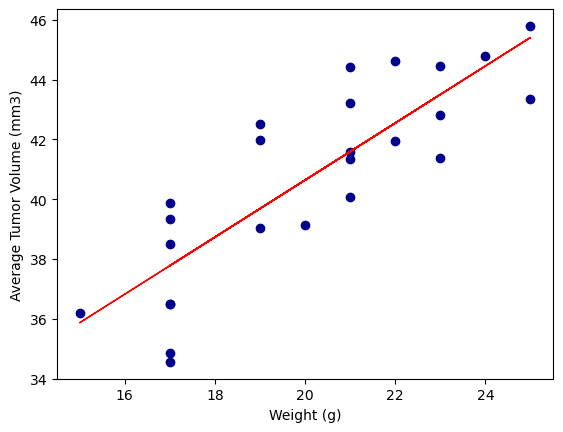

In [246]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter and calculate 
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
avg_tumor_vl = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_wgt = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
# Making the Plot
plt.scatter(mouse_weight, avg_tumor_volume, marker="o", color="darkblue")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

# Calc
mean_wgt = np.mean(mouse_wgt)
mean_tumor_vl = np.mean(avg_tumor_vl)
numerator = np.sum((mouse_wgt - mean_wgt) * (avg_tumor_vl - mean_tumor_vl))
den_wgt = np.sqrt(np.sum((mouse_wgt - mean_wgt) ** 2))
den_vl= np.sqrt(np.sum((avg_tumor_vl - mean_tumor_vl) ** 2))
correlation_coefficient = numerator / (den_wgt * den_vl)
# getting result to print
print(f"The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}")
# create regression
X = np.array(mouse_wgt)  
y = avg_tumor_vl

# calc slope int
X_mean = np.mean(X)
y_mean = np.mean(y)
slope = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
intercept = y_mean - slope * X_mean

tumor_vl = slope * X + intercept

plt.plot(X, tumor_vl, color="red", linewidth=1)

plt.show()


